In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2
input_data=pd.read_csv('sleep_data.csv')
input_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#3
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
#4
input_data.duplicated().sum()
#No duplicated rows found

np.int64(0)

In [5]:
#5
cat_cols=[col for col in input_data.columns if input_data[col].dtype=='object']
num_cols=cat_cols=[col for col in input_data.columns if input_data[col].dtype!='object']



In [6]:
#6
print(f'{cat_cols} and {num_cols}')

['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'] and ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


In [7]:
#7
input_data.shape

(374, 13)

In [8]:
#8
input_data[input_data.columns].nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [9]:
#9
input_data[cat_cols].nunique()

Person ID                  374
Age                         31
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
Heart Rate                  19
Daily Steps                 20
dtype: int64

In [10]:
#10
input_data.isnull().sum()/input_data.shape[0]*100

Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64

In [11]:
#11
input_data=input_data.drop(columns=['Person ID'])
input_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [17]:
#12
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Occupation' column (replace with your actual job column name)
encoder = OneHotEncoder(sparse_output=False, drop=None)
job_encoded = encoder.fit_transform(input_data[['Occupation']].astype(str))
job_columns = encoder.get_feature_names_out(['Occupation'])
job_df = pd.DataFrame(job_encoded, columns=job_columns, index=input_data.index)

# Concatenate the new one-hot columns to the original DataFrame
input_data = pd.concat([input_data.drop(columns=['Occupation']), job_df], axis=1)
input_data.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


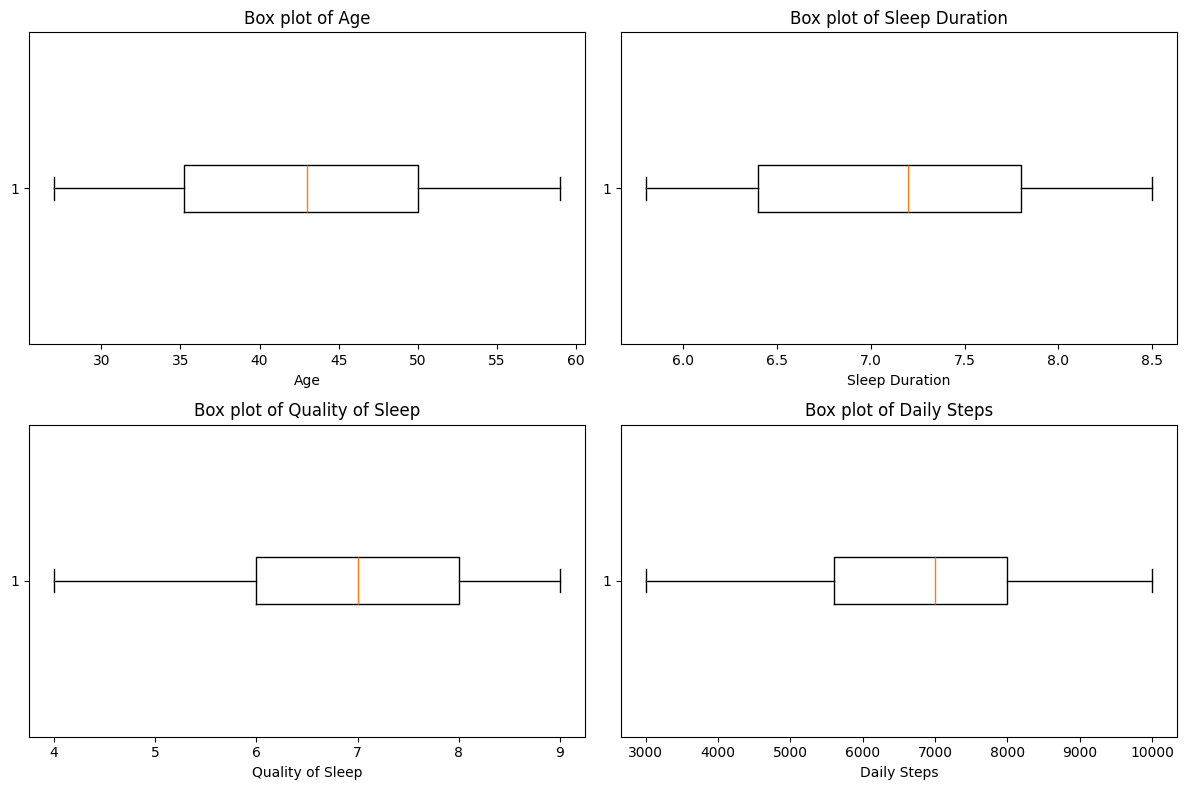

In [ ]:
#13
import matplotlib.pyplot as plt

features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Daily Steps']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(input_data[feature], vert=False)
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

#No need of outliers removal as there is no extreme outliers